# Random Signals and LTI-Systems

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Measurement of Acoustic Impulse Responses

The propagation of sound from one position (e.g. transmitter) to another (e.g. receiver) conforms reasonable well to the properties of a linear time-invariant (LTI) system. Consequently, the impulse response $h[k]$ characterizes the propagation of sound between theses two positions. Impulse responses have various applications in acoustics. For instance as [head-related impulse responses](https://en.wikipedia.org/wiki/Head-related_transfer_function) (HRIRs) or room impulse responses (RIRs) for the characterization of room acoustics. 

The following example demonstrates how an acoustic impulse response can be estimated with [correlation-based system identification techniques](correlation_functions.ipynb#System-Identification) using the soundcard of a computer. The module [`sounddevice`](http://python-sounddevice.readthedocs.org/) provides access to the soundcard via [`portaudio`](http://www.portaudio.com/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import sounddevice as sd

### Generation of the Measurement Signal

We generate white noise with a uniform distribution between $\pm 0.5$ as the excitation signal $x[k]$

In [2]:
fs = 44100  # sampling rate
T = 5  # length of the measurement signal in sec
Tr = 2  # length of the expected system response in sec

x = np.random.uniform(-.5, .5, size=T*fs)

### Playback of Measurement Signal and Recording of Room Response

The measurement signal $x[k]$ is played through the output of the soundcard and the response $y[k]$ is captured synchronously by the input of the soundcard. The length of the played/captured signal has to be of equal length when using the soundcard. The measurement signal $x[k]$ is zero-padded so that the captured signal $y[k]$ includes the complete system response.

Be sure not to overdrive the speaker and the microphone by keeping the input level well below 0 dB.

In [3]:
x = np.concatenate((x, np.zeros(Tr*fs)))
y = sd.playrec(x, fs, channels=1)
sd.wait()
y = np.squeeze(y)

print('Playback level: ', 20*np.log10(max(x)), ' dB')
print('Input level: ', 20*np.log10(max(y)), ' dB')

Playback level:  -6.02060087394  dB
Input level:  -2.23183822753  dB


### Estimation of the Acoustic Impulse Response

The acoustic impulse response is estimated by cross-correlation $\varphi_{yx}[\kappa]$ of the output with the input signal. Since the cross-correlation function (CCF) for finite-length signals is given as $\varphi_{yx}[\kappa] = \frac{1}{K} \cdot y[\kappa] * x[-\kappa]$, the computation of the CCF can be speeded up with the fast convolution method.

In [4]:
h = 1/len(y) * sig.fftconvolve(y, x[::-1], mode='full')
h = h[fs*(T+Tr):fs*(T+2*Tr)]

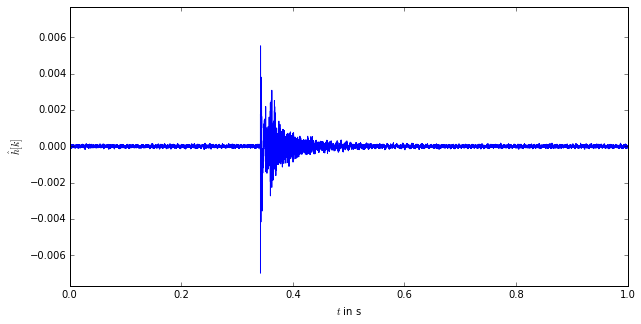

In [5]:
plt.figure(figsize=(10, 5))
t = 1/fs * np.arange(len(h))
plt.plot(t, h)
plt.axis([0.0, 1.0, -1.1*np.max(np.abs(h)), 1.1*np.max(np.abs(h))])
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$\hat{h}[k]$')

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.